<a href="https://colab.research.google.com/github/juansvas/testing_repo/blob/master/Feature_Selection_Using_Filter_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Towards Data Science Tutorial: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
# Fitting Linear Regression Models: https://medium.com/@contactsunny/linear-regression-in-python-using-scikit-learn-f0f7b125a204

# Feature Selection with sklearn & pandas
# Goal: Predict MEDV column in Boston dataset
# import boston library from sklearn's datasets
from sklearn.datasets import load_boston

#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sample_data
%matplotlib inline

# import specific sklearn models and tools
# sklearn model to split your data for training and testing
from sklearn.model_selection import train_test_split

# Linear regression model
from sklearn.linear_model import LinearRegression

# Feature selection model
from sklearn.feature_selection import RFE

#Ridge, Lasso, Ride, Lasso CV models
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# Load Boston dataset into x variable
x = load_boston()

# Turn x variable into DataFrame fitting feature_names to columns
df = pd.DataFrame(x.data, columns= x.feature_names)

# Create "MEDV" column, which is the target variable
df["MEDV"] = x.target

# Create feature matrix and target variable
X = df.drop("MEDV", 1)
y = df["MEDV"]

# Check df
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88  11.

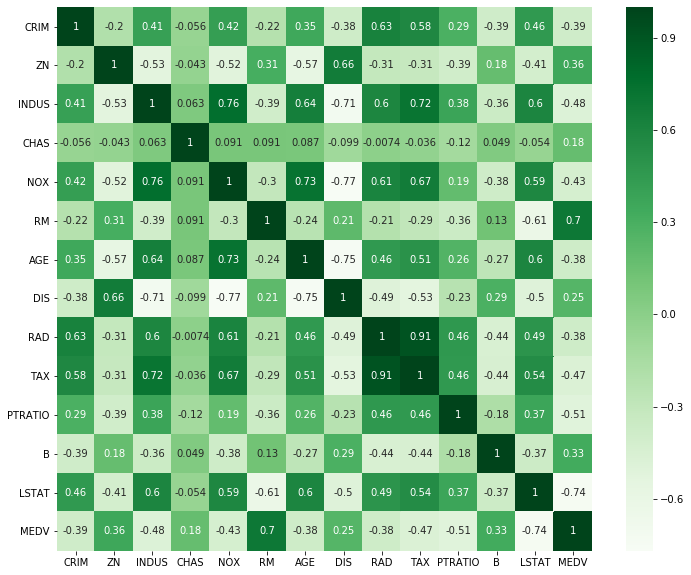

In [2]:
# Use Pearson Correlation to filter for features to select
# Features selected must have at least 0.5 corr with MEDV

# Create matrix as a figure using matplotlib
plt.figure(figsize=(12,10))

# Create correlation variable using df's method
cor = df.corr()

# Create seaborn heatmap of correlation variable
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)

# Show visualization
plt.show()

In [3]:
# Create output variable of targeted features using absolute value
cor_target = abs(cor["MEDV"])

# Select only highly correlated features w/ 0.5 or above
relevant_features = cor_target[cor_target>0.5]

# Show features 
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [4]:
# Check correlation between selected features (RM, PTRATIO, LSTAT)
# Use DataFrame's correlation method
print(df[["LSTAT", "PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


In [7]:
# RM and LSTAT are highly correlated at (-0.61) - keep only 1
# Choose the 1 more highly correlted w MEDV: LSTAT
# Drop RM
relevant_features.drop("RM")


PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [14]:
# DataFrame to use with model, featuring only the target variable (MEDV) and two selected features (PTRATIO, LSTAT)
df_model = df[["PTRATIO", "LSTAT", "MEDV"]]
df_model.head()

,PTRATIO,LSTAT,MEDV
0,15.3,4.98,24.0
1,17.8,9.14,21.6
2,17.8,4.03,34.7
3,18.7,2.94,33.4
4,18.7,5.33,36.2


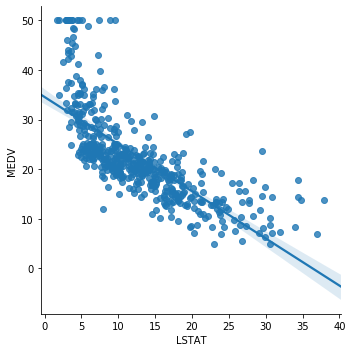

In [17]:
# View LSTAT and MEDV, as this will be used for fitting and prediction
sns.lmplot(x="LSTAT", y="MEDV", data=df_model)

In [0]:
# Create dependent and independent variables to inform split and test
x = df[["LSTAT"]].values
y = df[["MEDV"]].values

# Split dataset for 2/3 training, 1/3 testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [0]:
# Create Linear Regression model
model = LinearRegression()

# Fit the data to the model - AKA train the model - using unpacked variables generated from split
model.fit(x_train, y_train)

# Create prediction variable using test independent variable
y_prediction = model.predict(x_test)

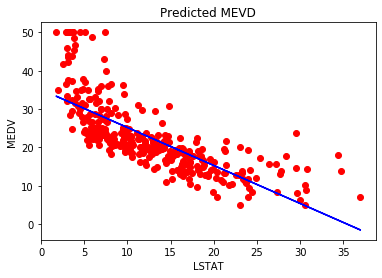

In [31]:
# Validate prediction by plotting actual values against predicted
# Plot actual values as red dots, pulling from the training dataset
plt.scatter(x_train, y_train, color='red')

# Plot linear regression prediction as a line
plt.plot(x_train, model.predict(x_train), color='blue')

# Give chart a title and labels
plt.title('Predicted MEVD')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()


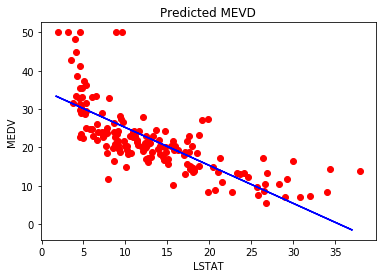

In [36]:
# Plot the test datatset
# Plot actual values as red dots, pulling from the test dataset
plt.scatter(x_test, y_test, color='red')

# Plot linear regression prediction as a line
plt.plot(x_train, model.predict(x_train), color='blue')

# Give chart a title and labels
plt.title('Predicted MEVD')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()